In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import defaultdict
from math import radians, cos, sin, asin, sqrt
import scipy.stats as stats
from scipy.stats import levene
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LouZhou1/ricedatathon2023/main/datathon_2024_dataset%20(1).csv")
data.head()

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,1,38,5,1,0,1,24,4,3,0
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,1,44,5,0,0,0,24,9,6,0
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,0,32,5,0,0,2,17,6,1,1
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,0,20,3,1,0,1,10,4,1,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,0,38,9,3,0,0,17,7,1,1


In [ ]:
data['game_date'] = data['game_date'].astype(str)
data['year'] = data['game_date'].str[:4].astype(int)
data['month'] = data['game_date'].str[4:6].astype(int)
data['day'] = data['game_date'].str[6:8].astype(int)
data.head()
data.drop(labels = ['game_date'], axis = 1)

,Unnamed: 0,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,year,month,day
0,0,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,...,1,0,1,24,4,3,0,2000,3,29
1,1,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,...,0,0,0,24,9,6,0,2000,3,30
2,2,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,0,0,2,17,6,1,1,2000,4,3
3,3,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,...,1,0,1,10,4,1,0,2000,4,3
4,4,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,3,0,0,17,7,1,1,2000,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,56770,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,...,0,0,0,17,16,3,1,2023,10,1
56771,56771,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,...,4,0,1,16,7,6,0,2023,10,1
56772,56772,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,...,0,1,3,15,8,1,0,2023,10,1
56773,56773,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,...,0,0,0,14,10,1,1,2023,10,1


In [ ]:
from typing_extensions import DefaultDict
city_column = pd.Series(data["city"].unique())
api_key = 'TC3yXtAMZvXjT0hTnPklERfaQmOa7LOwuCmOg35t'
def get_timezone(city):
    api_url = 'https://api.api-ninjas.com/v1/timezone?city={}'.format(city)
    response = requests.get(api_url, headers={'X-Api-Key': api_key})
    timezone_data = response.text.split(',')
    return timezone_data[0][14:-1]
#given a column of cities, how can I create a dictionary where
timezone_dict = {}
for city in city_column:
  timezone_dict[city] = get_timezone(city)

In [ ]:
data['time_zone'] = data['city'].map(timezone_dict)

In [ ]:
latitude_dict = {'Omaha': 41.2565,'Fort Bragg': 35.1378,'Sydney': -33.8688,'London': 51.5074, 'Dyersville': 42.4842,'Williamsport': 41.2412, 'Lake Buena Vista': 28.3852,'Monterrey': 25.4380,'Tokyo': 35.6895,'Dunedin': 28.0197,'Buffalo': 42.8864,'San Juan': 18.4655,'Montreal': 45.5017,'Washington': 38.8951,'Toronto': 43.6532,'Miami': 25.7617,'St. Petersburg': 27.7676,'Houston': 29.7604, 'Cleveland': 41.4993,'Oakland': 37.8049,'Detroit': 42.3314,'Baltimore': 39.2904,'St. Louis': 38.6270,'Cincinnati': 39.1031,'Kansas City': 39.0997,'Pittsburgh': 40.4406,'Phoenix': 33.4484,'Atlanta': 33.7490,'Boston': 42.3601,'Seattle': 47.6062,'San Diego': 32.7157,'Minneapolis': 44.9778,'Los Angeles': 34.0522,'Denver': 39.7392,'Anaheim': 33.8366,'Arlington': 32.7357,'Philadelphia': 39.9526,'San Francisco': 37.7749,'Milwaukee': 43.0389,'New York': 40.7128,'Chicago': 41.8781}
longitude_dict = {'Omaha': -95.9345,'Fort Bragg': -79.0078,'Sydney': 151.2093,'London': -0.1276,'Dyersville': -91.1290,'Williamsport': -77.0011,'Lake Buena Vista': -81.5639,'Monterrey': -100.9737,'Tokyo': 139.6917,'Dunedin': -82.7718,'Buffalo': -78.8784,'San Juan': -66.1057,'Montreal': -73.5673,'Washington': -77.0369,'Toronto': -79.3832,'Miami': -80.1918,'St. Petersburg': -82.6403,'Houston': -95.3698,'Cleveland': -81.6944,'Oakland': -122.2711,'Detroit': -83.0458,'Baltimore': -76.6122,'St. Louis': -90.1994,'Cincinnati': -84.5120,'Kansas City': -94.5786,'Pittsburgh': -79.9959,'Phoenix': -112.0740,'Atlanta': -84.3880,'Boston': -71.0589,'Seattle': -122.3321,'San Diego': -117.1611,'Minneapolis': -93.2650,'Los Angeles': -118.2437,'Denver': -104.9903,'Anaheim': -117.9143,'Arlington': -97.1081,'Philadelphia': -75.1652,'San Francisco': -122.4194,'Milwaukee': -87.9065,'New York': -74.0060,'Chicago': -87.6298}
data['latitude'] = data['city'].map(latitude_dict)
data['longitude'] = data['city'].map(longitude_dict)

In [ ]:
def distance(lat1, lat2, lon1, lon2):
  lon1 = radians(lon1)
  lon2 = radians(lon2)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * asin(sqrt(a))
  r = 3956
  return(abs(c * r))

In [ ]:
data["time_zone"].unique()

array(['Asia/Tokyo', 'America/New_York', 'America/Toronto',
       'America/Chicago', 'America/Los_Angeles', 'America/Phoenix',
       'Europe/Moscow', 'America/Denver', 'America/Detroit',
       'America/Puerto_Rico', 'Australia/Sydney', 'America/Monterrey',
       'Europe/London', 'Pacific/Auckland'], dtype=object)

In [ ]:
data.replace(['Europe/Moscow','Pacific/Auckland' ],'America/New_York',inplace=True )

In [ ]:
data['time_zone'].unique()

array(['Asia/Tokyo', 'America/New_York', 'America/Toronto',
       'America/Chicago', 'America/Los_Angeles', 'America/Phoenix',
       'America/Denver', 'America/Detroit', 'America/Puerto_Rico',
       'Australia/Sydney', 'America/Monterrey', 'Europe/London'],
      dtype=object)

In [ ]:
#filt = ((data["away_team"] == "SEA") | (data["home_team"] == "SEA")) & (data["year"]==2000)
#data[filt]
#goal: for each year, calculate the amount the home team traveled from their last game and the away team traveled from their last game
#ideas: loop thru each team, check if home or away, store distance in column
years_list = list(range(2000, 2024))
mlb_teams_abbreviations = data["home_team"].unique()
def get_team_sched(years, teams):
  count = 0
  for yr in years:
    yr_filt = data["year"]==yr
    data_yr = data[yr_filt]
    for team in teams:
      data_yr_team= data_yr[(data_yr["away_team"] == team) | (data_yr["home_team"] == team)]
get_team_sched(years_list, mlb_teams_abbreviations)

32


In [ ]:
def subset(years, lat_orig, lon_orig):
  dist_lst = []
  for year in years:
    lat = dict(lat_orig)
    lon = dict(lon_orig)
    yr_filt = data["year"]== year
    for i in range(0, len(data[yr_filt])):
          #find the team names"
          home_tm = data[yr_filt].iat[i,2]
          away_tm = data[yr_filt].iat[i,3]
          #get coordinates
          current_lat, current_lon = data[yr_filt].iat[i,33], data[yr_filt].iat[i,34]
          #get home distance and away distance
          home_dist = distance(lat[home_tm],current_lat,lon[home_tm],current_lon)
          away_dist = distance(lat[away_tm],current_lat,lon[away_tm],current_lon)
          #write changes in location to dictionary
          lat[home_tm] = current_lat
          lon[home_tm] = current_lon
          lat[away_tm] = current_lat
          lon[away_tm] = current_lon
          dist_lst.append([home_dist,away_dist])
  return dist_lst

In [ ]:
latitude = {'NYN': 40.7128,'CHN': 41.8781,'ATL': 33.7490,'CIN': 39.1031,'FLO': 25.7617,'MON': 45.5017,'SLN': 38.6270,'ANA': 34.0522,'BAL': 39.2904,'MIN': 44.9778,'OAK': 37.8049,'TEX': 32.7357,'TOR': 43.6532,'ARI': 33.4484,'PIT': 40.4406,'SEA': 47.6062,'HOU': 29.7604,'KCA': 39.0997,'TBA': 27.9506,'COL': 39.7392,'MIL': 43.0389,'PHI': 39.9526,'SDN': 32.7157,'SFN': 37.7749,'BOS': 42.3601,'DET': 42.3314,'NYA': 40.7128,'LAN': 34.0522,'CHA': 41.8781,'CLE': 41.4993,'WAS': 38.8951,'MIA': 25.7617}
longitude = {'NYN': -74.0060,'CHN': -87.6298,'ATL': -84.3880,'CIN': -84.5120,'FLO': -80.1918,'MON': -73.5673,'SLN': -90.1994,'ANA': -118.2437,'BAL': -76.6122,'MIN': -93.2650,'OAK': -122.2711,'TEX': -97.1081,'TOR': -79.3832,'ARI': -112.0740,'PIT': -79.9959,'SEA': -122.3321,'HOU': -95.3698,'KCA': -94.5786,'TBA': -82.4572,'COL': -104.9903,'MIL': -87.9065,'PHI': -75.1652,'SDN': -117.1611,'SFN': -122.4194,'BOS': -71.0589,'DET': -83.0458,'NYA': -74.0060,'LAN': -118.2437,'CHA': -87.6298,'CLE': -81.6944,'WAS': -77.0369,'MIA': -80.1918}

In [ ]:
latitude_copy = dict(latitude)
longitude_copy = dict(longitude)
years_list = list(range(2000, 2024))
dist = subset(years_list, latitude_copy, longitude_copy)

In [ ]:
#problem: for a given year, calculate the distance the home team for each game traveled, and the distance the away team traveled
df_columns = pd.DataFrame(dist)
df_result = pd.concat([data, df_columns], axis=1)
df_result

In [ ]:
df_result.isnull().sum()

In [ ]:
df_result.rename(columns={0: 'home_team_dist', 1: 'away_team_dist'}, inplace=True)

In [ ]:
df_result

In [ ]:
mlb_teams_abbreviations = df_result["home_team"].unique()
distances = []
for team in mlb_teams_abbreviations:
  add_1 = df_result[(df_result["year"]==2023) & (df_result["home_team"]==team)]["home_team_dist"].sum()
  add_2 = df_result[(df_result["year"]==2023) & (df_result["away_team"]==team)]["away_team_dist"].sum()
  distances.append(add_1 + add_2)

d = {"Teams": mlb_teams_abbreviations, "Distance Traveled": distances}
df = pd.DataFrame(data=d)
df.sort_values(by=['Distance Traveled'], ascending = False)

In [ ]:
df_result

In [ ]:
df_result.replace(['Pacific/Auckland','Europe/Moscow'],'America/New_York',inplace=True)

In [ ]:
relative_time_dct = {"America/Los_Angeles": 0, "America/Denver": 1, "America/Phoenix": 1, "America/Monterrey": 2, "America/Chicago": 2, "America/Toronto": 3, "America/Detroit": 3, "America/New_York": 3, "America/Puerto_Rico": 4, "Europe/London": 8, "Asia/Tokyo": 15, "Australia/Sydney": 17}
df_result['time_zone_num'] = df_result['time_zone'].map(relative_time_dct)
df_result

In [ ]:
df_result.isnull().values.sum()

0

In [ ]:
city_time_zone = pd.Series(df_result["time_zone_num"].values,index=df_result.city).to_dict()
city_time_zone

In [ ]:
def time_zone_diff(years, time_zone_orig):
  time_lst = []
  for year in years:
    lat = dict(time_zone_orig)
    yr_filt = df_result["year"]== year
    for i in range(0, len(df_result[yr_filt])):
          #find the team names"
          home_tm = df_result[yr_filt].iat[i,2]
          away_tm = df_result[yr_filt].iat[i,3]
          #get coordinates
          past_zone_home = time_zone_orig[home_tm]
          past_zone_away = time_zone_orig[away_tm]
          current_zone = df_result[yr_filt].iat[i,37]
          #get home distance and away distance
          time_zone_diff_home = current_zone - past_zone_home
          time_zone_diff_away = current_zone - past_zone_away
          #write changes in location to dictionary
          time_zone_orig[home_tm] = current_zone
          time_zone_orig[away_tm] = current_zone
          time_lst.append([time_zone_diff_home,time_zone_diff_away])
  return time_lst

In [ ]:
city_time_zone

In [ ]:
mlb_teams_dict = {'NYN': 'New York','CHN': 'Chicago','ATL': 'Atlanta','CIN': 'Cincinnati','FLO': 'Miami','MON': 'Montreal','SLN': 'St. Louis','ANA': 'Los Angeles','BAL': 'Baltimore','MIN': 'Minneapolis','OAK': 'Oakland','TEX': 'Arlington','TOR': 'Toronto','ARI': 'Phoenix','PIT': 'Pittsburgh','SEA': 'Seattle','HOU': 'Houston','KCA': 'Kansas City','TBA': 'St. Petersburg','COL': 'Denver','MIL': 'Milwaukee','PHI': 'Philadelphia','SDN': 'San Diego','SFN': 'San Francisco','BOS': 'Boston','DET': 'Detroit','NYA': 'New York','LAN': 'Los Angeles','CHA': 'Chicago','CLE': 'Cleveland','WAS': 'Washington','MIA': 'Miami'}
for team in mlb_teams_dict:
  mlb_teams_dict[team] = city_time_zone[mlb_teams_dict[team]]

In [ ]:
mlb_teams_dict

In [ ]:
df_result

In [ ]:
time_copy = dict(mlb_teams_dict)
years_list = list(range(2000, 2024))
time_zone_change = time_zone_diff(years_list, time_copy)
#problem: for a given year, calculate the distance the home team for each game traveled, and the distance the away team traveled
df_new_columns = pd.DataFrame(time_zone_change)  # Transpose to match the format
# Concatenate the existing DataFrame and the new DataFrame with new columns
df_result = pd.concat([df_result, df_new_columns], axis=1)
df_result.rename(columns={0: 'time_zone_diff_home', 1: 'time_zone_diff_away'}, inplace=True)

In [ ]:
df_result.isnull().values.sum()

0

In [ ]:
#how can I write a test function to check whether this works?
def tester_func(df, year, team):
  team_time_zone = mlb_teams_dict[team]
  filt = df["year"] == year
  for i in range(0, len(df[filt])):


In [ ]:
df_result["time_zone"].unique()

In [ ]:
df_result.to_csv("training_data.csv")

In [ ]:
df_result = df_result.assign(road_series_count_home = 0, road_series_count_away = 0)

In [ ]:
def day_of_year(date):
    year = int(date[:4])
    month = int(date[4:6])
    day = int(date[6:8])
    month_total = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if (((year % 4 == 0) & (year % 100 != 0)) | (year % 400 == 0)):
        month_total[2] = 29
    day_of_year= day + sum(month_total[:month])
    return day_of_year
df_result["game_date"] = df_result["game_date"].map(day_of_year)
df_result

In [ ]:
all_yrs = df_result["year"].unique()

In [ ]:
df_result = df_result.assign(road_days=0)

In [ ]:
df_result.drop()

In [ ]:
def days_on_the_road(years):
  mlb_teams_location = {"NYN": 0,"CHN": 0,"ATL": 0,"CIN": 0,"FLO": 0,"MON": 0, "SLN": 0,"ANA": 0,"BAL": 0, "MIN": 0,"OAK": 0,"TEX": 0,"TOR": 0,"ARI": 0,"PIT": 0,"SEA": 0,"HOU": 0,"KCA": 0,"TBA": 0,"COL": 0,"PHI": 0,"SDN": 0,"SFN": 0,"BOS": 0,"DET": 0,"NYA": 0,"LAN": 0,"CHA": 0,"CLE": 0,"WAS": 0,"MIA": 0, "MIL":0}
  mlb_teams_current_val = {"NYN": 0,"CHN": 0,"ATL": 0,"CIN": 0,"FLO": 0,"MON": 0, "SLN": 0,"ANA": 0,"BAL": 0, "MIN": 0,"OAK": 0,"TEX": 0,"TOR": 0,"ARI": 0,"PIT": 0,"SEA": 0,"HOU": 0,"KCA": 0,"TBA": 0,"COL": 0,"PHI": 0,"SDN": 0,"SFN": 0,"BOS": 0,"DET": 0,"NYA": 0,"LAN": 0,"CHA": 0,"CLE": 0,"WAS": 0,"MIA": 0, "MIL":0}
  days_lst = []
  for year in years:
    yr_filt = df_result["year"]== year
    for i in range(0, len(df_result[yr_filt])):
          date = df_result[yr_filt].iat[i,1]
          team_name = df_result.iat[i,3]
          past_date = mlb_teams_location[team_name]
          if past_date == 0:
            mlb_teams_location[team_name] = date
            mlb_teams_current_val[team_name] = mlb_teams_current_val[team_name] + 1
            days_lst.append(1)
          else:
            if date - past_date == 1:
              mlb_teams_location[team_name] = mlb_teams_location[team_name] + 1
              mlb_teams_current_val[team_name] = mlb_teams_current_val[team_name] + 1
              days_lst.append(mlb_teams_current_val[team_name])
            else:
              days_lst.append(1)
  return days_lst
days = days_on_the_road(all_yrs)

In [ ]:
df_new_columns = pd.DataFrame(days)  # Transpose to match the format
# Concatenate the existing DataFrame and the new DataFrame with new columns
df_result = pd.concat([df_result, df_new_columns], axis=1)
df_result.rename(columns={0: 'road_days'}, inplace=True)

In [ ]:
filter = df_result["away_team"]=="SEA"
df_result[filter]

In [ ]:
df_result.drop()

In [ ]:
df_result.isnull().values.sum()

0

In [ ]:
df_result.to_csv("training_data_2.csv")

In [ ]:
df_result["is_east_home"] = df_result["time_zone_diff_home"] > 0
df_result["is_east_home"]=df_result["is_east_home"].astype(int)
df_result["is_east_away"] = df_result["time_zone_diff_away"] > 0
df_result["is_east_away"]=df_result["is_east_away"].astype(int)
df_result.drop("is_west_home", axis = 1, inplace=True)

In [ ]:
df_result[["time_zone_diff_home","time_zone_diff_away"]]=df_result[["time_zone_diff_home","time_zone_diff_away"]].transform(lambda x: x.abs())

In [ ]:
df_result.to_csv("training_data_3.csv")

In [ ]:
df_result[["home_team","away_team","city","latitude","longitude","home_team_dist","away_team_dist", "time_zone_diff_home","time_zone_diff_away"]]

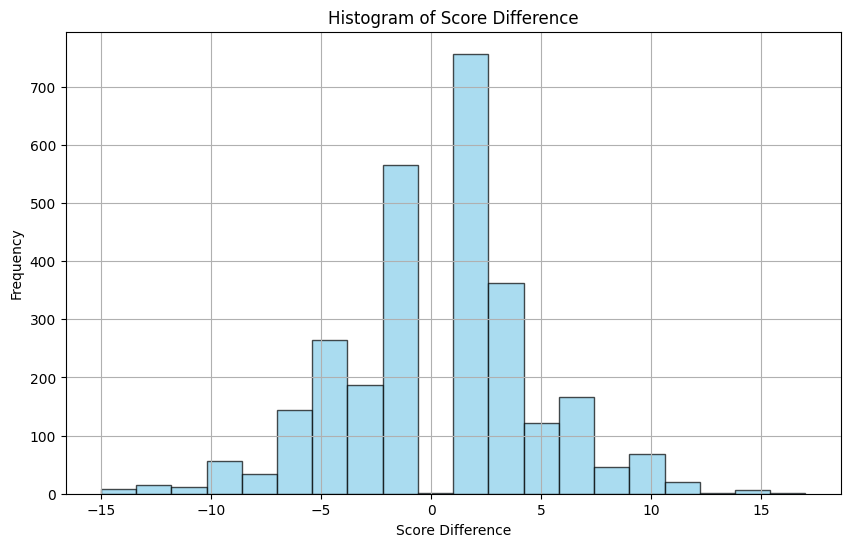

In [ ]:
df_result['is_day_game'] = df_result['is_day_game'].astype(int)
df_sample = df_result.sample(frac = 0.05)
X_1 = df_sample.iloc[:,35:]

X = df_sample.loc[:,'home_pa':'away_hbp']
y = df_sample.loc[:, 'home_score'] - df_sample.loc[:, 'away_score']
X_new = pd.concat([X_1, X], axis = 1)
X_new
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Score Difference')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.grid(True)

In [ ]:
regressor1 = Ridge(alpha = 1.0)
feature_selector = SFS(regressor1, k_features='best', forward=False, cv=5)

feature_selector = feature_selector.fit(X_new, y)


selected_features_indices = list(feature_selector.k_feature_idx_)


X_selected = X_new.iloc[:, selected_features_indices]


cv_scores = cross_val_score(regressor1, X_new, y, cv=5, scoring='r2')

average_r2 = np.mean(cv_scores)


print("Average R² Score:", average_r2)


Average R² Score: 0.8412920205393135


In [ ]:
df_result['Home_Win'] = df_result['home_score'] > df_result['away_score']

In [ ]:
def pythagorean_expectation(runs_scored, runs_against):
    return (runs_scored ** 2) / (runs_scored ** 2 + runs_against ** 2)


home_team_season_analysis = df_result.groupby(['year', 'home_team']).agg({'home_score': 'sum', 'away_score':'sum'}).rename(columns={'home_score': 'team_runs_scored_HOME', 'away_score':'team_runs_allowed_HOME'})
away_team_season_analysis = df_result.groupby(['year', 'away_team']).agg({'away_score': 'sum', 'home_score':'sum'}).rename(columns={'away_score':'team_runs_scored_AWAY', 'home_score':'team_runs_allowed_AWAY'})

home_team_season_analysis = home_team_season_analysis.reset_index()
away_team_season_analysis = away_team_season_analysis.reset_index()

team_season_analysis = pd.merge(home_team_season_analysis, away_team_season_analysis, left_on = ['year', 'home_team'], right_on = ['year', 'away_team'], how = 'outer')
team_season_analysis['home_pythagorean_expectation'] = pythagorean_expectation(team_season_analysis['team_runs_scored_HOME'], team_season_analysis['team_runs_allowed_HOME'])
team_season_analysis['away_pythagorean_expectation'] = pythagorean_expectation(team_season_analysis['team_runs_scored_AWAY'], team_season_analysis['team_runs_allowed_AWAY'])

team_season_analysis.head(35)

In [ ]:
def prepare_data(df):
  year = df['year']
  home_team = df['home_team']
  away_team = df['away_team']
  home_team_pythagorean = team_season_analysis[(team_season_analysis['year'] == year) & (team_season_analysis['home_team'] == home_team)]['home_pythagorean_expectation'].iloc[0]
  away_team_pythagorean = team_season_analysis[(team_season_analysis['year'] == year) & (team_season_analysis['away_team'] == away_team)]['away_pythagorean_expectation'].iloc[0]
  return home_team_pythagorean > away_team_pythagorean

df_result['Expected_Pythagorean_Result'] = df_result.apply(prepare_data, axis = 1)
df_result.head()


In [ ]:
def create_granger_causality_offensive(team_abbrev,venue, baseball_stat, fatigue_stat,year):
  new_df = df_result[((df_result['home_team'] == team_abbrev) | (df_result['away_team'] == team_abbrev)) & (df_result['year'] == year)].reset_index()
  baseball_stats = []
  fatigue_stats = []
  for row in range(new_df.shape[0]):
    home_team = False
    if new_df['venue'][row] == venue:
      home_team = True
    if home_team:
      baseball_stats.append(new_df['away_' + baseball_stat][row])
      fatigue_stats.append(new_df['home_' + fatigue_stat][row])
    else:
      baseball_stats.append(new_df['home_' + baseball_stat][row])
      fatigue_stats.append(new_df['away_' + fatigue_stat][row])
  new_df_2 = pd.DataFrame()
  new_df_2['baseball_stat'] = baseball_stats
  new_df_2['fatigue_stat'] = fatigue_stats
  scaler1 = MinMaxScaler()
  scaler2 = MinMaxScaler()
  scaled_baseball_stat = scaler1.fit_transform(np.array(new_df_2['baseball_stat']).reshape(-1,1))
  scaled_fatigue_stat = scaler2.fit_transform(np.array(new_df_2['fatigue_stat']).reshape(-1,1))
  plt.figure(figsize=(10,4))
  plt.plot(scaled_fatigue_stat, color='r')
  plt.plot(scaled_baseball_stat, color='b')
  plt.legend([fatigue_stat, 'Opponent ' + baseball_stat], fontsize=16)
  plt.title('{} {} Time Series'.format(year, team_abbrev))
  granger_df = pd.DataFrame(np.hstack([scaled_baseball_stat, scaled_fatigue_stat]), columns=['baseball_stat', 'fatigue_stat'])
  grangercausalitytests(granger_df, maxlag=3)

def create_granger_causality_defensive(team_abbrev,venue, baseball_stat, fatigue_stat,year):
  new_df = df_result[((df_result['home_team'] == team_abbrev) | (df_result['away_team'] == team_abbrev)) & (df_result['year'] == year)].reset_index()
  baseball_stats = []
  fatigue_stats = []
  for row in range(new_df.shape[0]):
    home_team = False
    if new_df['venue'][row] == venue:
      home_team = True
    if home_team:
      baseball_stats.append(new_df['home_' + baseball_stat][row])
      fatigue_stats.append(new_df['home_' + fatigue_stat][row])
    else:
      baseball_stats.append(new_df['away_' + baseball_stat][row])
      fatigue_stats.append(new_df['away_' + fatigue_stat][row])
  new_df_2 = pd.DataFrame()
  new_df_2['baseball_stat'] = baseball_stats
  new_df_2['fatigue_stat'] = fatigue_stats
  scaler1 = MinMaxScaler()
  scaler2 = MinMaxScaler()
  scaled_baseball_stat = scaler1.fit_transform(np.array(new_df_2['baseball_stat']).reshape(-1,1))
  scaled_fatigue_stat = scaler2.fit_transform(np.array(new_df_2['fatigue_stat']).reshape(-1,1))
  plt.figure(figsize=(10,4))
  plt.plot(scaled_fatigue_stat, color='r')
  plt.plot(scaled_baseball_stat, color='b')
  plt.legend([fatigue_stat, 'Team ' + baseball_stat], fontsize=16)
  plt.title('{} {} Time Series'.format(year, team_abbrev))
  granger_df = pd.DataFrame(np.hstack([scaled_baseball_stat, scaled_fatigue_stat]), columns=['baseball_stat', 'fatigue_stat'])
  grangercausalitytests(granger_df, maxlag=3)


In [ ]:
create_granger_causality_offensive("HOU","HOU03", 'oba_conceded', 'team_dist',2000)
create_granger_causality_defensive("HOU","HOU03", 'oba_conceded', 'team_dist',2000)